# Modeling and Evaluation

In [1]:
### ALL THE IMPORTS NEEDED FOR THIS PHASE

# Data wrangling
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Understanding the results of an evaluation
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Exporting/importing models
from joblib import dump

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv", header=None)
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv", header=None)

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120889, 37), (30223, 37), (120889, 1), (30223, 1))

In [4]:
X_train.head()

,purchase_value,age,seconds_between_purchase_signup,purchase_hour,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,...,country_Taiwan; Republic of China (ROC),country_United Kingdom,country_United States,country_Unknown,purchase_day_of_week_Monday,purchase_day_of_week_Saturday,purchase_day_of_week_Sunday,purchase_day_of_week_Thursday,purchase_day_of_week_Tuesday,purchase_day_of_week_Wednesday
0,0.712890,-0.017282,-1.138580,-0.653497,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.549086,0.678751,1.302103,-1.087733,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.198160,0.910763,-1.330176,-0.653497,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.549086,-0.133288,0.171997,0.504464,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-1.361965,1.258780,-0.339607,-0.364007,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


## Classification algorithms

* We recall that we seek to predict the outputs of a dichotomous variable, namely __class__.
* For the continuation, we will call class 0 (legal transactions) of variable __class__ the negative class, and class 1 (illegal transactions) will be referred to as the positive class. 
* In part 1, we applied the usual classification models. In this part, we will use boosting models.

### AdaBoost

#### Decision Tree as base estimator

Let us apply to our data an AdaBoost classifier built on 100 decision trees. We will give two different maximum depths. 

##### Maximum depth : 5

In [5]:
tree_estimator = DecisionTreeClassifier(max_depth=5)
ada_boost_depth_5 = AdaBoostClassifier(base_estimator=tree_estimator, n_estimators=100)
ada_boost_depth_5.fit(X_train, y_train)
ada_boost_depth_5.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 5,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': 'deprecated',
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(max_depth=5),
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': None}

In [6]:
print("AdaBoost score based on a Tree Decision (max depth 5) on the training set :", ada_boost_depth_5.score(X_train, y_train))
print("AdaBoost score based on a Tree Decision (max depth 5) on the test set :", ada_boost_depth_5.score(X_test, y_test))

AdaBoost score based on a Tree Decision (max depth 5) on the training set : 0.9606663964463268
AdaBoost score based on a Tree Decision (max depth 5) on the test set : 0.9518578565992787


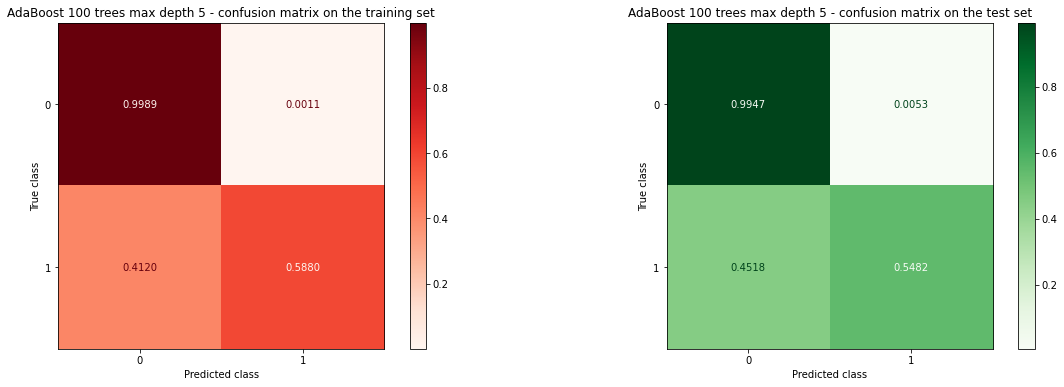

In [7]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)

plot_confusion_matrix(ada_boost_depth_5, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("AdaBoost 100 trees max depth 5 - confusion matrix on the training set")
axs[0].set_xlabel("Predicted class")
axs[0].set_ylabel("True class")

plot_confusion_matrix(ada_boost_depth_5, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("AdaBoost 100 trees max depth 5 - confusion matrix on the test set")
axs[1].set_xlabel("Predicted class")
axs[1].set_ylabel("True class")

plt.show()

In [8]:
print("AdaBoost 100 trees max depth 5 : classification metrics on the training set")
print(classification_report(y_true=y_train, y_pred=ada_boost_depth_5.predict(X_train)))
print()
print("AdaBoost 100 trees max depth 5 : classification metrics on the test set")
print(classification_report(y_true=y_test, y_pred=ada_boost_depth_5.predict(X_test)))

AdaBoost 100 trees max depth 5 : classification metrics on the training set
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    109635
           1       0.98      0.59      0.74     11254

    accuracy                           0.96    120889
   macro avg       0.97      0.79      0.86    120889
weighted avg       0.96      0.96      0.96    120889


AdaBoost 100 trees max depth 5 : classification metrics on the test set
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27326
           1       0.92      0.55      0.69      2897

    accuracy                           0.95     30223
   macro avg       0.93      0.77      0.83     30223
weighted avg       0.95      0.95      0.95     30223



We obtain approximately the same results as the random forest model.

##### Maximum depth : 10

In [9]:
tree_estimator = DecisionTreeClassifier(max_depth=10, class_weight="balanced")
ada_boost_depth_10 = AdaBoostClassifier(base_estimator=tree_estimator, n_estimators=100)
ada_boost_depth_10.fit(X_train, y_train)
ada_boost_depth_10.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': 'balanced',
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 10,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': 'deprecated',
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=10),
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': None}

In [10]:
print("AdaBoost score based on a Tree Decision (max depth 10) on the training set :", ada_boost_depth_10.score(X_train, y_train))
print("AdaBoost score based on a Tree Decision (max depth 10) on the test set :", ada_boost_depth_10.score(X_test, y_test))

AdaBoost score based on a Tree Decision (max depth 10) on the training set : 1.0
AdaBoost score based on a Tree Decision (max depth 10) on the test set : 0.948185156999636


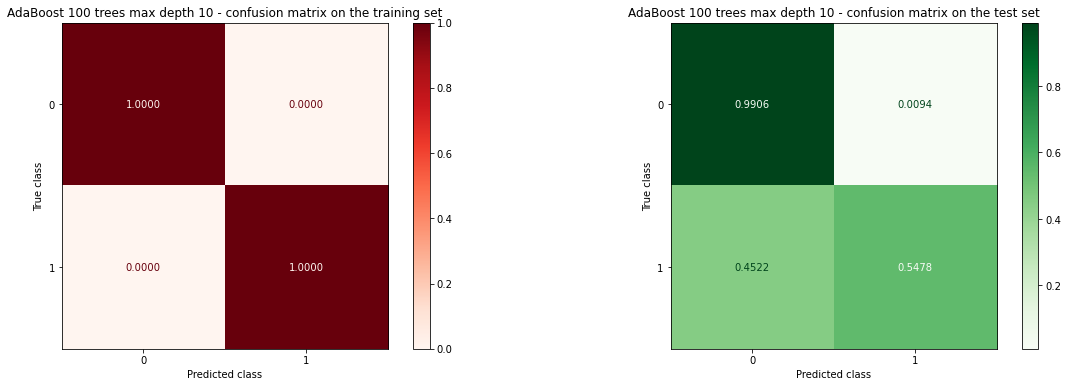

In [11]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)

plot_confusion_matrix(ada_boost_depth_10, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("AdaBoost 100 trees max depth 10 - confusion matrix on the training set")
axs[0].set_xlabel("Predicted class")
axs[0].set_ylabel("True class")

plot_confusion_matrix(ada_boost_depth_10, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("AdaBoost 100 trees max depth 10 - confusion matrix on the test set")
axs[1].set_xlabel("Predicted class")
axs[1].set_ylabel("True class")

plt.show()

This AdaBoost model is clearly overfitted : on the training set, 100% of the observations are properly recognized for both classes whereas on the test set, the model makes good predictions for only 55% of the individuals from the positive class.

#### Logistic Regression as base estimator

We will now apply an AdaBoost classifier built on 100 logistic regression models.

In [12]:
log_reg_estimator = LogisticRegression()
ada_boost_log_reg = AdaBoostClassifier(base_estimator=log_reg_estimator, n_estimators=100)
ada_boost_log_reg.fit(X_train, y_train)
ada_boost_log_reg.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__C': 1.0,
 'base_estimator__class_weight': None,
 'base_estimator__dual': False,
 'base_estimator__fit_intercept': True,
 'base_estimator__intercept_scaling': 1,
 'base_estimator__l1_ratio': None,
 'base_estimator__max_iter': 100,
 'base_estimator__multi_class': 'auto',
 'base_estimator__n_jobs': None,
 'base_estimator__penalty': 'l2',
 'base_estimator__random_state': None,
 'base_estimator__solver': 'lbfgs',
 'base_estimator__tol': 0.0001,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': LogisticRegression(),
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': None}

In [13]:
print("AdaBoost score based on a Logistic Regression estimator on the training set :", ada_boost_log_reg.score(X_train, y_train))
print("AdaBoost score based on a Logistic Regression estimator on the test set :", ada_boost_log_reg.score(X_test, y_test))

AdaBoost score based on a Logistic Regression estimator on the training set : 0.9069063355640298
AdaBoost score based on a Logistic Regression estimator on the test set : 0.9041458491877047


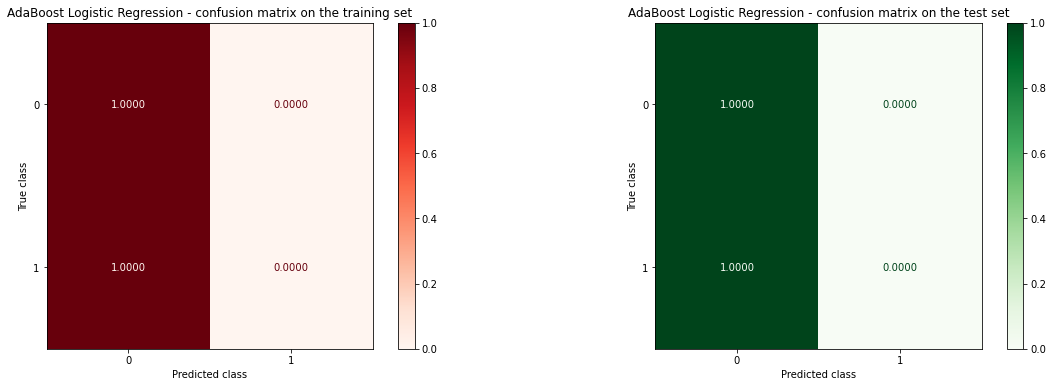

In [14]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)

plot_confusion_matrix(ada_boost_log_reg, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("AdaBoost Logistic Regression - confusion matrix on the training set")
axs[0].set_xlabel("Predicted class")
axs[0].set_ylabel("True class")

plot_confusion_matrix(ada_boost_log_reg, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("AdaBoost Logistic Regression - confusion matrix on the test set")
axs[1].set_xlabel("Predicted class")
axs[1].set_ylabel("True class")

plt.show()

As we can see in the two confusion matrices, the AdaBoost model which is based estimator on a logistic regression became a one-rule model ("always predict the negative class).

### XGBoost

In [15]:
xg_boost = XGBClassifier()
xg_boost.fit(X_train, y_train)
xg_boost.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [16]:
print("XGBoost score on the training set :", xg_boost.score(X_train, y_train))
print("XGBoost score on the test set :", xg_boost.score(X_test, y_test))

XGBoost score on the training set : 0.9568777969873189
XGBoost score on the test set : 0.956390828177216


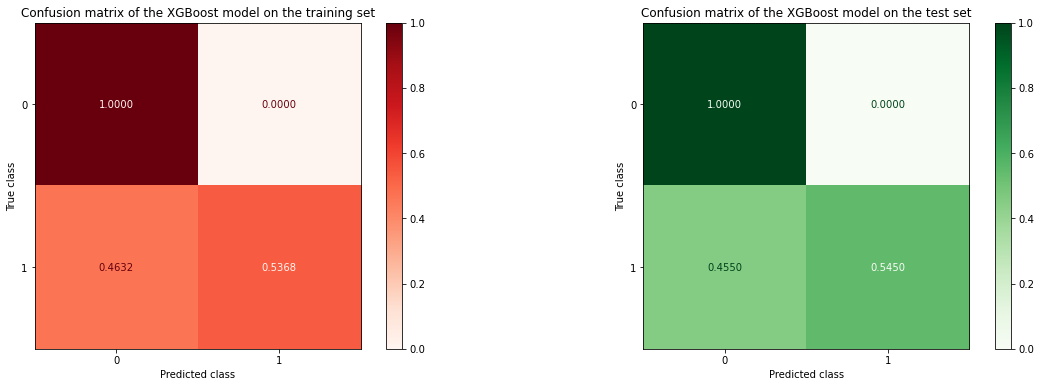

In [17]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)

plot_confusion_matrix(xg_boost, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Confusion matrix of the XGBoost model on the training set")
axs[0].set_xlabel("Predicted class")
axs[0].set_ylabel("True class")

plot_confusion_matrix(xg_boost, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Confusion matrix of the XGBoost model on the test set")
axs[1].set_xlabel("Predicted class")
axs[1].set_ylabel("True class")

plt.show()

We do not get better results than with the random forest or the first AdaBoost model.

In [18]:
feature_importance_xg_boost = pd.DataFrame(
    data=xg_boost.feature_importances_.reshape(-1, 1),
    index=X_train.columns, 
    columns=["Score"])
feature_importance_xg_boost = feature_importance_xg_boost.sort_values(by="Score", ascending=False)

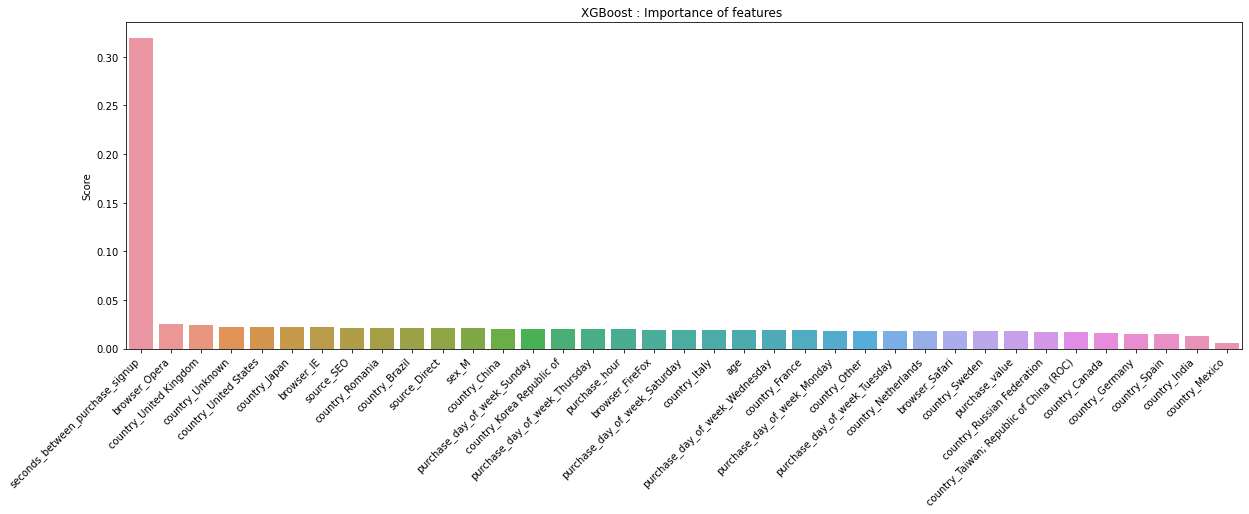

In [19]:
plt.figure(figsize=(20,6))
plt.title("XGBoost : Importance of features ")
ax = sns.barplot(data=feature_importance_xg_boost, y="Score", x=feature_importance_xg_boost.index)
ax.set_xticklabels(feature_importance_xg_boost.index, rotation=45, ha="right")
plt.show()

## Exporting models

We export the most relevant models for comparison in the next section.

In [20]:
dump(ada_boost_depth_5, "ada_boost_depth_5.joblib")
dump(xg_boost, "xg_boost.joblib")

['xg_boost.joblib']